In [3]:
import os
import pandas as pd
import numpy as np

In [4]:
filename = 'Daily Bike Sharing.csv'
path = '..\Dataset'
filepath = os.path.join(path,filename)

In [5]:
df = pd.read_csv(filepath, 
                 index_col='dteday',
                 parse_dates=True)

In [6]:
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [7]:
df = df.asfreq("D")
df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

In [8]:
df.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [10]:
df.shape

(731, 15)

In [14]:
y = df["cnt"]
df.drop('cnt', axis=1, inplace=True)

<AxesSubplot:xlabel='dteday'>

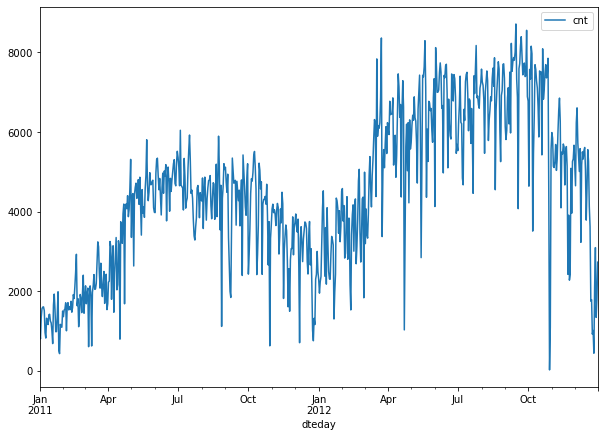

In [15]:
#df["cnt"].plot(figsize = (10, 7), legend = True)
y.plot(figsize = (10, 7), legend = True)

In [18]:
#Training and test set
test_days = 31
training_set = df.iloc[:-test_days, :]
test_set = df.iloc[-test_days:, :]
test_set.tail(1)
training_set_y = y.iloc[:-test_days]
test_set_y = y.iloc[-test_days:]

In [19]:
#libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
#forecasting model
model = ExponentialSmoothing(endog = training_set_y,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 7).fit()

C:\Users\choubeyy\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [21]:
predictions_hw = model.forecast(steps = len(test_set)).rename("HW")
predictions_hw.head()

2012-12-01    4676.804684
2012-12-02    4153.246795
2012-12-03    4322.003783
2012-12-04    4279.673415
2012-12-05    4825.991667
Freq: D, Name: HW, dtype: float64

<AxesSubplot:xlabel='dteday'>

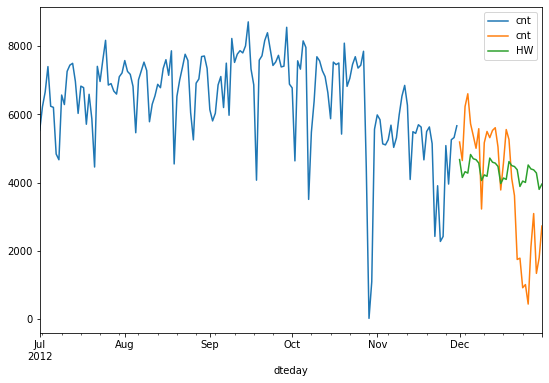

In [22]:
training_set_y['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set_y.plot(legend = True)
predictions_hw.plot(legend = True)

In [23]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set_y, predictions_hw),0))
print(round(np.sqrt(mean_squared_error(test_set_y, predictions_hw)), 0))

1389.0
1698.0


In [25]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set_y, predictions_hw)

87.26099293841784